In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def norm2(a,b):
### norme usuelle dans R2 ###
    return a**2 + b**2

In [3]:
def make(a,b,c,d):
### renvoie une matrice 2x2 ###
    return np.array([[a,b],[c,d]])

def get(mat):
### renvoie les coefficients de la matrice 2x2 ###
    return (mat[0,0],mat[0,1],mat[1,0],mat[1,1])

def flip(mat):
### effectue un flip dans la matrice 2x2 ###
    a,b,c,d = get(mat)
    return make(c,d,-a,-b)

def turn(mat):
### effectue l'operation turn : change la diagonale de la triangulation ###
    a,b,c,d = get(mat)
    return make(-c,-d,a+c,b+d)

def plot(mat):
### affiche la triangulation : seulement deux triangles ###
    a,b,c,d = get(mat)
    plt.axis('equal')
    plt.plot([0,a,a+c,0,c,a+c],[0,b,b+d,0,d,b+d])

def flippable_turn(mat):
### effectue une ou plusieurs fois turn pour obtenir un triangle flippable au sens de Delaunay dans un tore carré ###
    a,b,c,d = get(mat)
    n1,n2,n3 = norm2(a,b),norm2(c,d),norm2(a+c,b+d)
    if n1>=n2 and n1>=n3 :
        return turn(mat)
    elif n2>=n1 and n2>=n3 :
        return turn(turn(mat))
    else :
        assert n3>=n1 and n3>=n2
        return mat

def is_reduced(mat):
### renvoie vrai si la matrice est réduite ie Delaunay dans le cadre du tore carré ###
    a,b,c,d = get(mat)
    return abs(a)+abs(b)+abs(c)+abs(d)<3


In [5]:
#mat = make(1,0,0,1)
mat = make(7,3,9,4)

In [4]:
def flip_algorithm(mat):
### effectue l'algorithme de flip, renvoie le nombre de flips ###
    i = 0
    mat = flippable_turn(mat)
    while not is_reduced(mat):
        mat = flip(mat)
        mat = flippable_turn(mat)
        i+=1
    return i

dico_flips = {}
def fast_flip_algorithm(mat):
### effectue l'algorithme de flip, renvoie le nombre de flips ###
    i = 0
    mat_signature = get(mat) #copie la matrice
    mat = flippable_turn(mat)
    while not ( get(mat) in dico_flips or is_reduced(mat) ):
        mat = flip(mat)
        mat = flippable_turn(mat)
        i+=1
    
    if get(mat) in dico_flips :
        i+= dico_flips[get(mat)]
    if not mat_signature in dico_flips :
        dico_flips[mat_signature] = i
    return i

In [7]:
flip_algorithm(mat)

6

In [5]:
def generate_primes(n):
### genere les nombres premiers de 2 à n-1 ###
    l_primes = []
    table = np.ones(n,dtype=bool)
    table[0] = False
    table[1] = False
    for i in range( 2, int(np.sqrt(n)+1) ) :
        if table[i] :
            l_primes.append(i)
            for j in range(2,n//i+1):
                if i*j<n:
                    table[i*j]=False
    for i in range(int(np.sqrt(n)), n) :
        if table[i] :
            l_primes.append(i)
    return l_primes

In [6]:
# l_primes est une constante utilisée dans le reste du programme 
l_primes = generate_primes(10000)

In [7]:
def find_decomp(k):
### renvoie la décomposition en nombre premier de k, 
# sous la forme d'une liste de tuples (p,i) avec p**i qui divise k ###
    if k==0:
        raise Exception
    l_decomp = []
    for p in l_primes :
        if k==1:
            return l_decomp

        i=0
        while k%(p**(i+1)) ==0 : 
            i+=1
        if i>0:
            k = k//(p**i)
            l_decomp.append((p,i))
    return(l_decomp)

In [8]:
find_decomp(10)

[(2, 1), (5, 1)]

In [9]:
def find_divisors(k):
### renvoie la liste des diviseurs de k ###
    l_decomp = find_decomp(k)
    l_div = [1]
    for (p,i) in l_decomp:
        l_div += [ d*p**j for j in range(1,i+1) for d in l_div]
    return l_div


In [13]:
find_divisors(71)

[1, 71]

In [10]:
def generate_matricies(n):
### genere toutes les matrices de produit diagonal au plus n, regroupées par produit diagonal
# sous la forme d'une liste de liste de matrices ###  
    l_primes = generate_primes(n)
    l_mat = []
    l_div_prec = find_divisors(1)
    for k in range(2,n):
        l_mat_k = []
        l_div = find_divisors(k)
        for d1 in l_div :
            for d2 in l_div_prec :
                b1 = k//d1
                b2 = (k-1)//d2
                l_mat_k.append(make(d1,d2,b2,b1)) # matrice associée à  k
        l_div_prec = l_div
        l_mat.append(l_mat_k)
    return l_mat


In [15]:
generate_matricies(4)

[[array([[1, 1],
         [1, 2]]),
  array([[2, 1],
         [1, 1]])],
 [array([[1, 1],
         [2, 3]]),
  array([[1, 2],
         [1, 3]]),
  array([[3, 1],
         [2, 1]]),
  array([[3, 2],
         [1, 1]])]]

In [11]:
def mat_norm(mat):
### norme 2 de la diagonale ###
    a,b,c,d = get(mat)
    return np.sqrt( (a+c)**2 + (b+d)**2 )

def estimation_flip(mat):
### renvoie une estimation *précise* du nombre de flips ###
    a,b,c,d = get(mat)
    if min (a,d) == min(a,b,c,d):
        return int (   np.ceil((b+c)/min(a,d))+min(a,d)-1   )
    else:
        return int (   np.ceil((a+d-1)/min(b,c))+min(c,b)-1   )
    

In [24]:
n = 800
generated_matricies = generate_matricies(n)

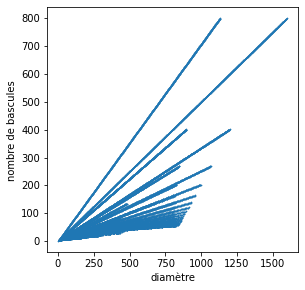

In [27]:
################################################################
# calcul et compare le nombre de flips avec d'autres métriques #
################################################################

l_x = []
l_y_vrai = []
l_y_estim = []
l_y_ecart = []
l_m=[]
k=2

#fig, (ax1, ax2) = plt.subplots(2, 1)
fig, ax1 = plt.subplots(1, 1)
#fig.set_size_inches(8.5, 20.)
fig.set_size_inches(4.5, 4.5)
#fig.suptitle("Complexité de l\'algorithme de flip")


for l_mat_k in generated_matricies:
    for mat in l_mat_k:
        number_flip = fast_flip_algorithm(mat)
        l_x.append(mat_norm(mat))
        l_y_vrai.append(number_flip)
        l_y_estim.append(estimation_flip(mat))
        l_y_ecart.append(estimation_flip(mat)-number_flip)
        l_m.append(mat)
    k+=1

#plt.axis('equal')
#plt.scatter(l_x,l_y_vrai,s=1,marker=",")
#plt.scatter(l_x,l_y_estim,s=1,marker=",")
ax1.scatter(l_x,l_y_vrai,s=1,marker=".")
ax1.set_xlabel("diamètre")
ax1.set_ylabel("nombre de bascules ")
#ax2.scatter(l_y_vrai,l_y_estim,s=1,marker=".")
#ax2.set_xlabel("nombre de flips estimés en fonction du nombre de flip")
fig.savefig('complexite_simple.png', dpi=700)

In [65]:
# fonction de test
for i in range(len(l_m)):
    if l_y_ecart[i] > 3:
        print("matrice, estimation, nombre de flips :\n",l_m[i],l_y_estim[i],l_y_vrai[i])

matrice, estimation, nombre de flips :
 [[13  8]
 [21 13]] 11 7
matrice, estimation, nombre de flips :
 [[13 21]
 [ 8 13]] 11 7
matrice, estimation, nombre de flips :
 [[10 13]
 [13 17]] 12 8
matrice, estimation, nombre de flips :
 [[17 13]
 [13 10]] 12 8


In [22]:
l_x[-10:],l_y_vrai[-10:]

([265.03018695990085,
  232.1055794245369,
  221.22612865572637,
  210.85777196963835,
  217.33154395991392,
  209.267771049438,
  207.80038498520642,
  212.82152146810716,
  224.50167037240502,
  282.1364917907643],
 [69, 39, 31, 29, 29, 31, 39, 69, 101, 199])

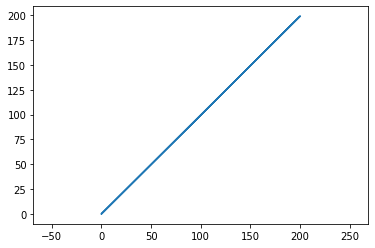

In [66]:
plot(mat)

In [67]:
mat = flippable_turn(mat)


In [68]:
mat = flip(mat)

In [28]:
len(l_x)

29662